# Sameer Bhatti

Our goal in this assignment is to write a simulator that can randomly generate sequences of "weathers" from this state transition function.

In [12]:
import numpy as np
import random as rand
from collections import Counter
import matplotlib.pyplot as plt
import scipy.linalg

# Step Process
1. Define States and transition matrix
2. Randomly select the first state
3. Create the Simulator to generate a sequence of weathers given the transition matrix
4. Define the number of days
5. Run the simulator
6. Graph the results for some number of days against the stationary distribution

## Definitions

We begin by defining the states and the transition matrix of the simulator. The states are abbreviated for 's' for sunny, 'c' for cloudy, and 'r' for rainy. The simulator is then initialized by a day that is randomly generated.

In [13]:
# Define State
state = ['s', 'c', 'r']

# Define Transition Matrix
mat = np.array([[.8, .2, 0.0],[.4, .4, .2],[.2, .6, .2]])

# Randomly generate first state
firstDay = rand.choice(state)
print(firstDay)

r


## Create simulator

The Simulator takes an input of the number of days, the state of the first day that is randomly generated, the state matrix, and the transition matrix. The first day is inserted into a list to define the first day of the weather sequence. Using the function rand.choices, the state and the transition matrix are inputted where the weights for how the day is selected is determined by the previous day. Therefore, the index is used to select which list of weights are taken from the transition matrix depending on if the previous day was sunny, cloudy, or rainy. For example, if the previous day was sunny, the index would be 0 for the first row of the transition matrix. The weights would then be 0.8 for sunny, 0.2 for cloudy, and 0 for rainy. 

From the weather sequence, the number of each state is counted using the Counter function. Those values are stored in the list counts. The function then returns the weather sequence and the counts of each state.

In [14]:

def weatherSim(numDays, firstDay, state, transMat):
    '''''''''''''''''''''''''''
    input:
        numDays: integer of number of days simulating
        firstDay: State of the first day, either 's', 'c', or 'r'
        state: List of states
        transMat: numpy array of transition matrix
    output:
        counts: List of counts of each day outputted as[s,c,r]
        weathers: Sequence of weathers
    '''''''''''''''''''''''''''
    # Define weather sequence
    weathers = [firstDay]
    
    # Simulator
    index = state.index(firstDay)
    counts = []
    
    for i in range(numDays-1):
        nextDay = rand.choices(state,weights=transMat[index],k=1)
        weathers.append(nextDay[0])
        index = state.index(nextDay[0])
        
    countsDict = Counter(weathers)
    counts = [countsDict['s'],countsDict['c'],countsDict['r']]
    return counts, weathers
    

The getNorm function will take in the counts from the weatherSim function and output the normalized values of those counts.

In [15]:
def getNorm(countsList):
    '''''''''''''''''''''''''''
    input:
        countsList: List of the counts for sunny, cloudy, and rainy
        
    output:
        norm: List of the counts normalized
    '''''''''''''''''''''''''''
    
    norm = [float(i)/sum(countsList) for i in countsList]
    return norm


## Run Simulator

The simulator is now run by first defining the number of days. Using the first day that was previously generated and the state and transition matrices, the counts and weather sequence are found. The counts are normalized and printed below.

In [16]:
# Define number of days
k = 1500

# Run Simulator
counts, weathers = weatherSim(k,firstDay,state,mat)
norms = getNorm(counts)

print('The weather counts are sunny: ' + str(counts[0]) + ' cloudy: ' + str(counts[1]) + ' rainy: ' + str(counts[2]))
print('The normalized probability of each weather are sunny: ' + str(norms[0]) + ' cloudy: ' + str(norms[1]) + ' rainy: ' + str(norms[2]))

The weather counts are sunny: 964 cloudy: 429 rainy: 107
The normalized probability of each weather are sunny: 0.6426666666666667 cloudy: 0.286 rainy: 0.07133333333333333


## Determining Stationary Distribution

The stationary distribution is what the normalized probability should each converge to. To assess this visually, the number of days were initialized to a large number. The first state is determined by the random generation similarly as above. These are used with the weatherSim function to determine the weather sequence and counts. The weather sequence is then parsed to append an array for the normalized probability of each state for sunny, cloudy, and rainy after each day. For example, the first state could be rainy, giving a probability of 0 for sunny and cloudy after the first day and a probability of 1 after the first day. Then the 2nd day in the sequence could be cloudy making the probabilities 0 for sunny, 0.5 for cloudy, and 0.5 for rainy. This would continue for every day of the weather sequence (i.e. taking a result every transition).

This method is much faster than solving for the normalized parts every iteration of the a day through the weather simulator. This piece was inspired by Jordan Gittleman.

In [17]:
# Define the number of days
numDays = 10000

In [18]:
s = np.zeros(numDays)
c = np.zeros(numDays)
r = np.zeros(numDays)

statFirstDay = rand.choice(state)
print('The start state is ' + statFirstDay)

weatherCounts, weatherSeq = weatherSim(numDays,statFirstDay,state,mat)

for i in range(0,10000,1):
    countsDict = Counter(weatherSeq[0:i])
    counts = [countsDict['s'],countsDict['c'],countsDict['r']]
    if len(countsDict) == 0:
        s[i] = 0
        c[i] = 0
        r[i] = 0
    else:
        norms = getNorm(counts)
        s[i] = norms[0]
        c[i] = norms[1]
        r[i] = norms[2]


The start state is c


The stationary distribution is defined below from the solutions provided analytically and plotted along with the state counts.

In [19]:
stationary = [9/14, 2/7, 1/14] # Problem 2.4 https://github.com/pptacher/probabilistic_robotics/blob/master/ch2_recursive_state_estimation/ch2_recursive_state_estimation.pdf

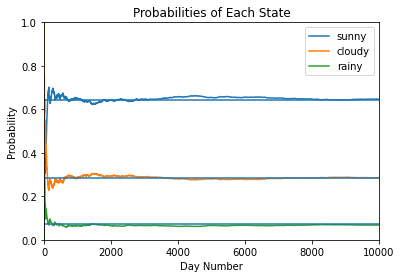

In [20]:
plt.axis([0, numDays, 0, 1])
plt.plot(s)
plt.plot(c)
plt.plot(r)
for i in range(3):
    plt.axhline(stationary[i])
plt.legend(['sunny','cloudy','rainy'])
plt.title('Probabilities of Each State')
plt.xlabel('Day Number') 
plt.ylabel('Probability')
plt.show()

### Results

The normalized probabilities were all graphed for the number of days. Using the stationary distribution provided from the answer key, it can be seen that the probabilties are approached at a little less than 2000 days, more closely 1500 days. 

## Calculate Stationary Distribution

The stationary distribution was calculated by finding the eigenvalues and eigenvectors of the transpose of the transition matrix. Using the left eigenvectors of that 3x3 matrix, we can normalize the eigenvectors to produce the stationary distribution.

In [21]:
vals, vec = scipy.linalg.eig(np.transpose(mat))
leftVec = vec[:,0]

statDistrib = getNorm(leftVec)
print(statDistrib)
print(stationary) # Defined above

[0.6428571428571429, 0.2857142857142857, 0.0714285714285714]
[0.6428571428571429, 0.2857142857142857, 0.07142857142857142]


We show that the state matrix is diagnolizable by taking the real parts of the eigenvalues and creating a 3x3 matrix from it where the eigenvalues are along the diagonal. We then find the inverse of the eigenvectors and take the dot product of the eigenvectors, eigenvalues, and inverse of the eigenvalues. We can see that the results are the same as the transition matrix.

In [22]:
# Diagnolizable
eigVals = np.zeros((3,3))
for i in range(len(eigVals)):
    eigVals[i,i] = vals[i].real

vecInv = scipy.linalg.inv(vec)

x = vec.dot(eigVals.dot(vecInv))
print(x)
print(mat)

[[8.00000000e-01 4.00000000e-01 2.00000000e-01]
 [2.00000000e-01 4.00000000e-01 6.00000000e-01]
 [3.66317442e-17 2.00000000e-01 2.00000000e-01]]
[[0.8 0.2 0. ]
 [0.4 0.4 0.2]
 [0.2 0.6 0.2]]
